In [2]:
import collections
import networkx as nx
%pylab inline
plt.style.use('seaborn-dark')

Populating the interactive namespace from numpy and matplotlib


#Importing TICKERS

In [3]:
companies = dict()
fh = open('/content/drive/MyDrive/DSFM/data/input/components.csv','r')
for line in fh: 
    s = line.strip().split(',')
    companies[s[1]] = s[0]
fh.close()
n = len(companies)

# BUIDING NETWORK FROM PEARSON EDGE LISTS

In [7]:
#build network
fh=open('/content/drive/MyDrive/DSFM/data/edgeslist/edgeslistP.txt', 'r')
G_pearson = nx.Graph()
for line in fh: 
    s = line.strip().split(' ')
    G_pearson.add_edge(s[0],s[1],weight = float(s[2]))
fh.close()

#get giant component
pearson_components = sorted(list(G_pearson.subgraph(c) for c in nx.connected_components(G_pearson)), key=len, reverse=True)
pearson_GCC = pearson_components[0]

# BUIDING NETWORK FROM Kendall EDGE LISTS 


In [8]:
fh=open('/content/drive/MyDrive/DSFM/data/edgeslist/edgeslistK.txt', 'r')
G_kendall = nx.Graph()
for line in fh: 
    s = line.strip().split(' ')
    G_kendall.add_edge(s[0],s[1],weight = float(s[2]))
fh.close()

#get giant component
kendall_components = sorted(list(G_kendall.subgraph(c) for c in nx.connected_components(G_kendall)), key=len, reverse=True)
kendall_GCC = kendall_components[0]

# BUilding Network from spearman Edge LISTS

In [9]:
fh=open('/content/drive/MyDrive/DSFM/data/edgeslist/edgeslistS.txt', 'r')
G_spearman = nx.Graph()
for line in fh: 
    s = line.strip().split(' ')
    G_spearman.add_edge(s[0],s[1],weight = float(s[2]))
fh.close()

#get giant component
spearman_components = sorted(list(G_spearman.subgraph(c) for c in nx.connected_components(G_spearman)), key=len, reverse=True)
spearman_GCC = spearman_components[0]


# Multiplex Analysis 


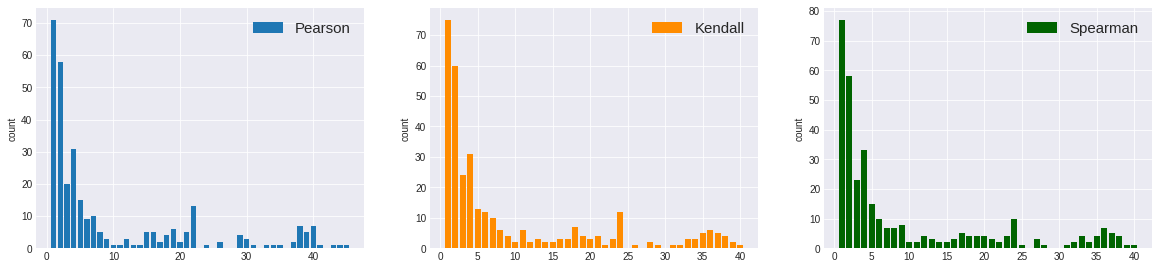

In [10]:
degree_sequence_P = sorted([d for n, d in G_pearson.degree()], reverse=True)  
degreeCount_P = collections.Counter(degree_sequence_P)
deg_P, cnt_P = zip(*degreeCount_P.items())

#Kendall
degree_sequence_K = sorted([d for n, d in G_kendall.degree()], reverse=True)  
degreeCount_K = collections.Counter(degree_sequence_K)
deg_K, cnt_K = zip(*degreeCount_K.items())

#Spearman
degree_sequence_S = sorted([d for n, d in G_spearman.degree()], reverse=True)  
degreeCount_S = collections.Counter(degree_sequence_S)
deg_S, cnt_S = zip(*degreeCount_S.items())

plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3, 3), (0, 0), ylabel='count')
ax2 = plt.subplot2grid((3, 3), (0, 1), ylabel='count')
ax3 = plt.subplot2grid((3, 3), (0, 2), ylabel='count')

ax1.bar(deg_P, cnt_P, width=0.80, label='Pearson')
ax2.bar(deg_K, cnt_K, width=0.80,color = 'darkorange', label ='Kendall')
ax3.bar(deg_S, cnt_S, width=0.80, color='darkgreen', label = 'Spearman')

ax1.grid()
ax1.legend(fontsize=15)
ax2.grid()
ax2.legend(fontsize=15)
ax3.grid()
ax3.legend(fontsize=15)

In [13]:

p_degree_dict = dict(G_pearson.degree())
k_degree_dict = dict(G_kendall.degree())
s_degree_dict = dict(G_spearman.degree())


overlapping_degree = dict() #key:node; value: degrees in different layers
for k in p_degree_dict.keys(): 
    overlapping_degree[k] = [p_degree_dict[k],0,0]
    
for k in k_degree_dict.keys(): 
    if k not in overlapping_degree.keys(): 
        overlapping_degree[k] = [0,k_degree_dict[k],0]
    else: 
        overlapping_degree[k][1] = k_degree_dict[k]
        
for k in s_degree_dict.keys(): 
    if k not in overlapping_degree.keys(): 
        overlapping_degree[k] = [0,0,s_degree_dict[k]]
    else: 
        overlapping_degree[k][2] = s_degree_dict[k]


In [14]:
keys = list(overlapping_degree.keys())
values = list(overlapping_degree.values())
degree = [[float(k),v[0],v[1],v[2]] for k,v in zip(keys,values)]
degree.sort(key=lambda x: x[1])
degree.reverse()

#overlapping degree
od = [d[1]+d[2]+d[3] for d in degree]
od.sort()
od.reverse()

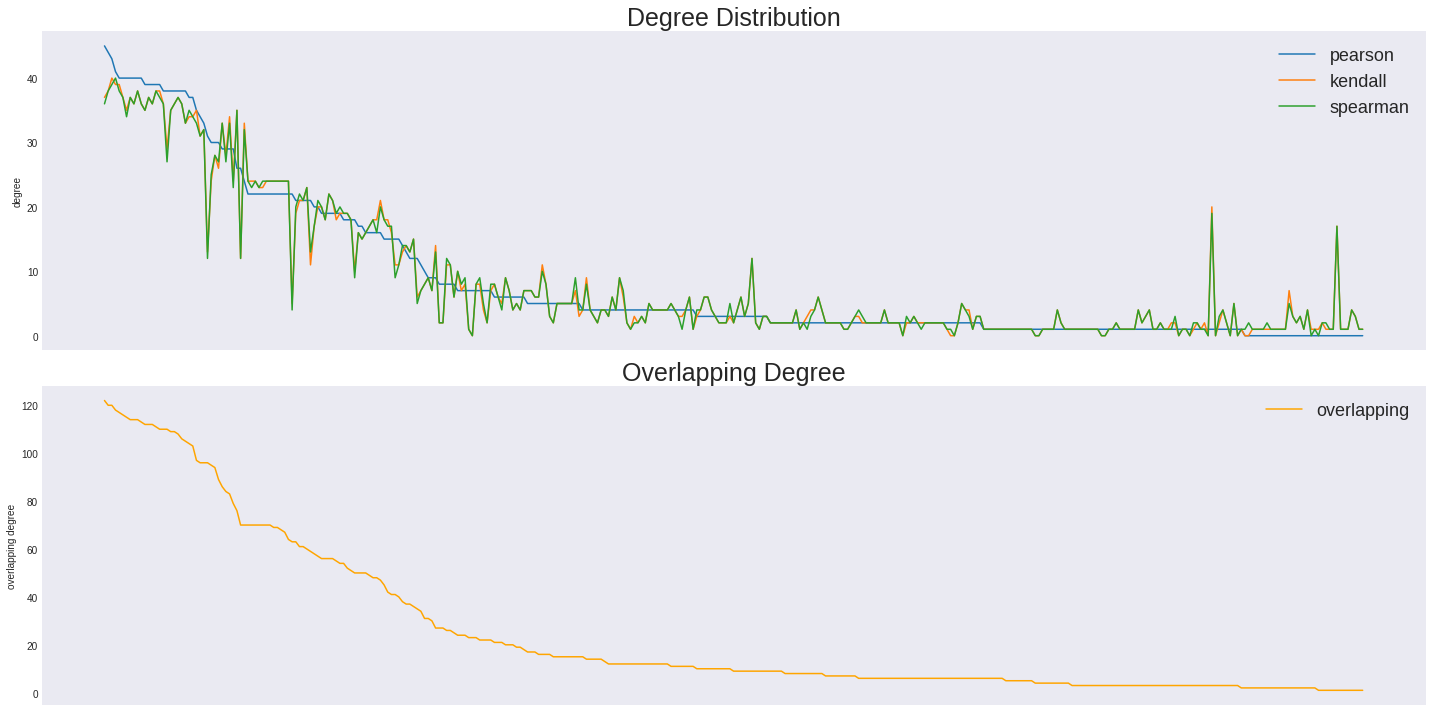

In [15]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=3,colspan=1,ylabel='degree')
ax2 = plt.subplot2grid((6,1),(3,0),rowspan=3,colspan=1,sharex=ax1, ylabel = 'overlapping degree')

ax1.plot([i for i in range(len(degree))],[d[1] for d in degree],label = 'pearson')
ax1.plot([i for i in range(len(degree))],[d[2] for d in degree],label = 'kendall')
ax1.plot([i for i in range(len(degree))],[d[3] for d in degree], label = 'spearman')
ax2.plot([i for i in range(len(od))],od, label = 'overlapping',color='orange')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)

ax1.set_title('Degree Distribution', size = 25)
ax2.set_title('Overlapping Degree', size = 25)
plt.xticks([])

plt.tight_layout()


In [16]:
#pearson
degree.sort(key=lambda x: x[1])
degree.reverse()
pearson_first10 = [int(d[0]) for d in degree[0:10]]

#kendall
degree.sort(key=lambda x: x[2])
degree.reverse()
kendall_first10 = [int(d[0]) for d in degree[0:10]]

#spearman
degree.sort(key=lambda x: x[3])
degree.reverse()
spearman_first10 = [int(d[0]) for d in degree[0:10]]

#overlapping
degree_o = [[d[0],d[1]+d[2]+d[3]] for d in degree]
degree_o.sort(key=lambda x: x[1])
degree_o.reverse()
overlapping_first10 = [int(d[0]) for d in degree_o[0:10]]

In [17]:
print('\n\t\t###  MOST IMPORTANT NODES  ###\n')
print('Pearson:',pearson_first10)
print('Kendall:',kendall_first10)
print('Spearman:',spearman_first10)
print('Overlapping:',overlapping_first10)


		###  MOST IMPORTANT NODES  ###

Pearson: [417, 438, 264, 402, 55, 88, 101, 109, 244, 348]
Kendall: [264, 366, 402, 248, 58, 88, 438, 222, 428, 348]
Spearman: [402, 264, 438, 88, 248, 366, 109, 348, 428, 222]
Overlapping: [264, 438, 402, 417, 366, 88, 248, 58, 348, 109]


## Multiplex Participation Coefficient 

In [18]:
P = [] 
M = 3. #n of layers
for d in degree: 
    oi = (d[1] + d[2] + d[3])
    di = d[1]**2 + d[2]**2 + d[3]**2
    p = (M/(M-1))*(1-di/oi**2)
    P.append([d[0],p,oi])

P.sort(key=lambda x: x[1])
P.reverse()

Text(0.5, 0, '% nodes')

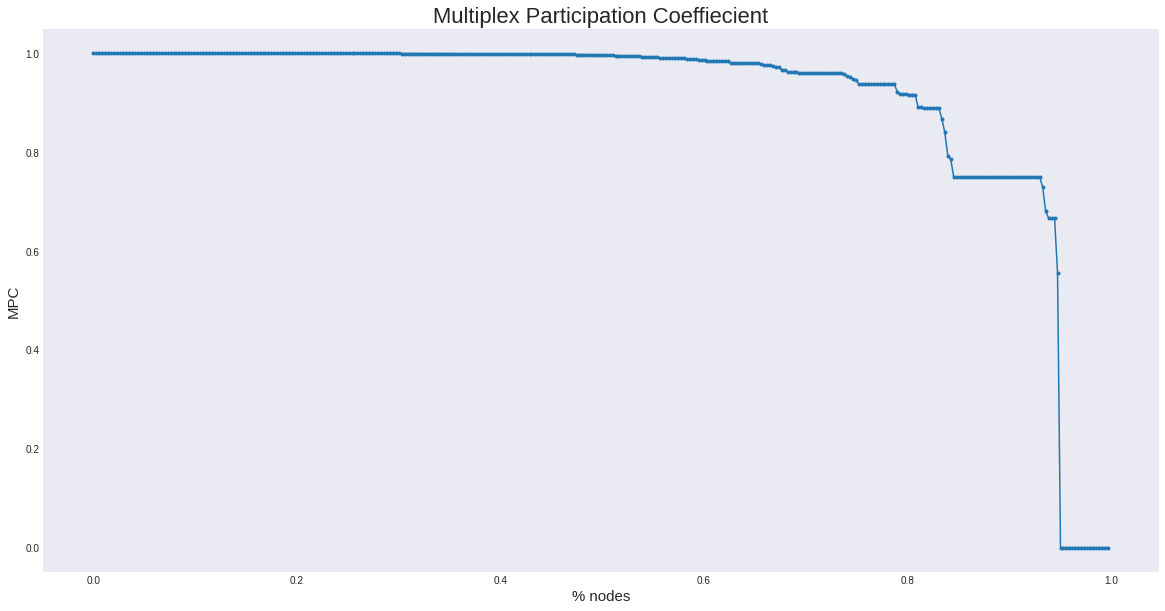

In [19]:
plt.figure(figsize=(20,10))
plt.plot([i/len(P) for i in range(len(P))],[p[1] for p in P],marker='.')
plt.title('Multiplex Participation Coeffiecient', size = 22)
plt.ylabel('MPC', size = 15);
plt.xlabel('% nodes', size = 15)

Using MPC and Overlapping degree we can plot the multiplex cartography, dividing nodes in:

focused hubs (high overlapping, small MPC);
multiplex hubs (high overlapping, high MPC);
focused leaves (small overlapping, small MPC);
multiplex leaves (small overlapping, high MPC).




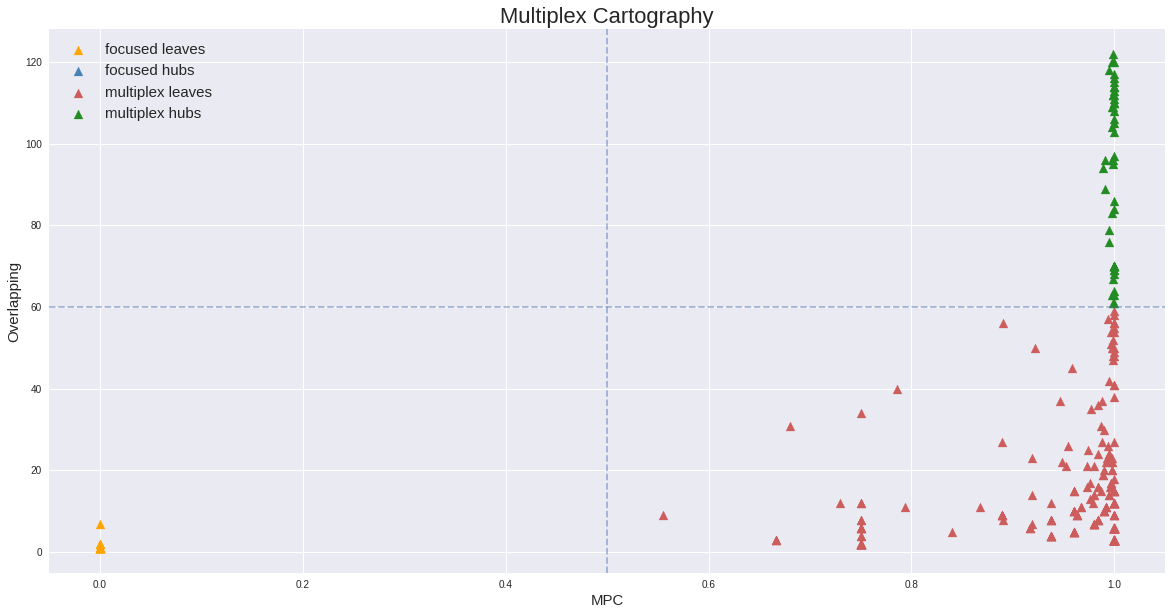

In [20]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.scatter([p[1] for p in P if p[1]<0.5 and p[2]<60], [p[2] for p in P if p[1]<0.5 and p[2]<60],s = 80,marker ='^',color='orange',label='focused leaves')
plt.scatter([p[1] for p in P if p[1]<0.5 and p[2]>60], [p[2] for p in P if p[1]<0.5 and p[2]>60],s = 80,marker ='^',color='steelblue',label='focused hubs')
plt.scatter([p[1] for p in P if p[1]>0.5 and p[2]<60], [p[2] for p in P if p[1]>0.5 and p[2]<60],s = 80,marker ='^',color='indianred',label='multiplex leaves')
plt.scatter([p[1] for p in P if p[1]>0.5 and p[2]>60], [p[2] for p in P if p[1]>0.5 and p[2]>60],s = 80,marker ='^',color='forestgreen',label='multiplex hubs')
plt.axhline(y=60, xmin=0, xmax=1, linestyle ='--',alpha=0.5)
plt.axvline(x=0.5, ymin=0, ymax=120, linestyle ='--',alpha=0.5)
plt.ylabel('Overlapping',size=15)
plt.xlabel('MPC',size = 15)
plt.title('Multiplex Cartography',size = 22)
plt.legend(fontsize=15)

# SIMILARITY

In [21]:
Q_pk = 0
Q_ps = 0
Q_ks = 0

for d in degree: 
    if d[1] != 0:
        b_p = 1
    else: 
        b_p = 0
        
    if d[2] != 0:
        b_k = 1
    else: 
        b_k = 0
        
    if d[3] != 0:
        b_s = 1
    else: 
        b_s = 0
        
    Q_pk += b_p * b_k
    Q_ps += b_p * b_s
    Q_ks += b_k * b_s

Q_pk = Q_pk / len(degree)
Q_ps = Q_ps / len(degree)
Q_ks = Q_ks / len(degree)

In [22]:
print('\n\t ### SIMILARITY ###\n')
print('Pearson-Kendall', Q_pk)
print('Pearson-Spearman', Q_ps)
print('Kendall-Spearman', Q_ks)


	 ### SIMILARITY ###

Pearson-Kendall 0.8629737609329446
Pearson-Spearman 0.8658892128279884
Kendall-Spearman 0.9475218658892128


# GIS SECTOR 

In [23]:
sector = ['Industrials',
 'Health Care',
 'Information Technology',
 'Consumer Discretionary',
 'Utilities',
 'Financials',
 'Materials',
 'Real Estate',
 'Consumer Staples',
 'Energy',
 'Telecommunication Services']

In [24]:
#match ticker and sector
ticker_sector = dict()
fh = open('/content/drive/MyDrive/DSFM/data/input/S&P500List.csv')
for line in fh: 
    s = line.strip().split(',')
    ticker_sector[s[0]] = s[2]
    
#match nodes and sector
nodes_sector = dict()
for k in companies.keys(): 
    nodes_sector[k] = ticker_sector[companies[k]]

In particular we consider the average degree of nodes of a sector as a proxy of the importance of that sector in each layer:

In [25]:
sector_overlapping = dict() 
sector_pearson = dict()
sector_kendall = dict()
sector_spearman = dict()
sector_count = dict()

for s in sector: 
    sector_overlapping[s] = 0
    sector_pearson[s] = 0
    sector_kendall[s] = 0
    sector_spearman[s] = 0
    sector_count[s] = 0

for d in degree:
    node = int(d[0])
    sec = nodes_sector[str(node)]
    
    sector_overlapping[sec] += (d[1]+d[2]+d[3])
    sector_pearson[sec] += d[1]
    sector_kendall[sec] += d[2]
    sector_spearman[sec] += d[3]
    sector_count[sec] += 1

for s in sector: 
    sector_overlapping[s] = sector_overlapping[s]/sector_count[s]
    sector_pearson[s] = sector_pearson[s]/sector_count[s]
    sector_kendall[s] = sector_kendall[s]/sector_count[s]
    sector_spearman[s] = sector_spearman[s]/sector_count[s]

In [26]:
sec_o = []
sec_p = []
sec_k = []
sec_s = []

for k,v in zip(sector_overlapping.keys(),sector_overlapping.values()):
    sec_o.append([k,v])
sec_o.sort(key=lambda x: x[1])

for k,v in zip(sector_pearson.keys(),sector_pearson.values()):
    sec_p.append([k,v])
sec_p.sort(key=lambda x: x[1])

for k,v in zip(sector_kendall.keys(),sector_kendall.values()):
    sec_k.append([k,v])
sec_k.sort(key=lambda x: x[1])

for k,v in zip(sector_spearman.keys(),sector_spearman.values()):
    sec_s.append([k,v])
sec_s.sort(key=lambda x: x[1])


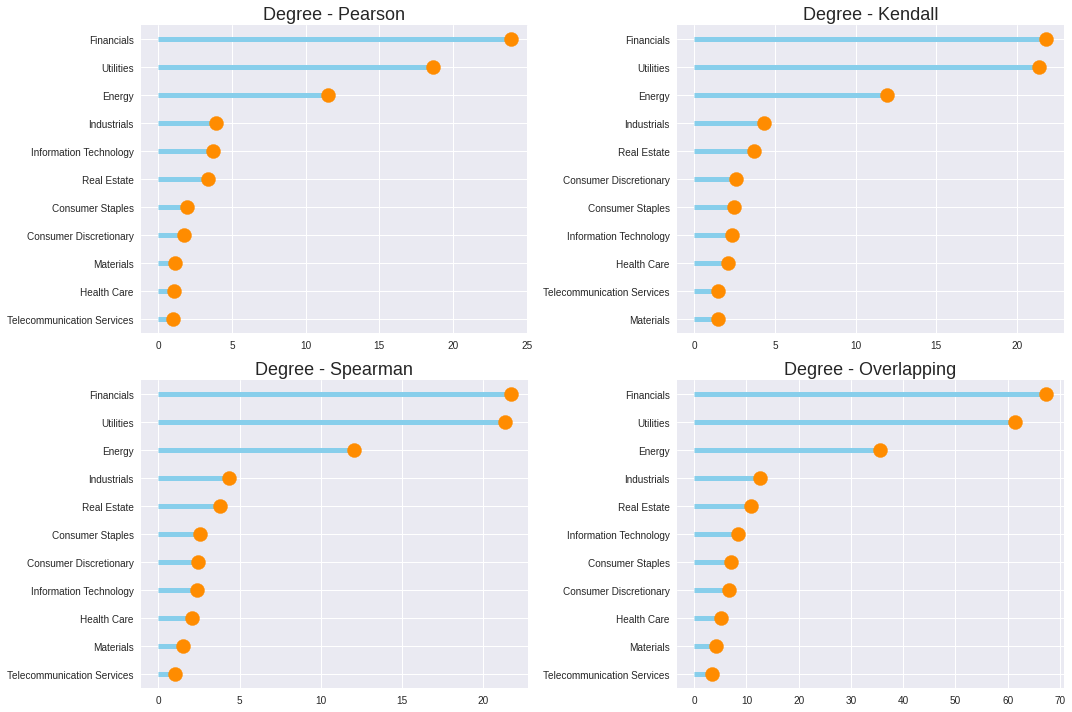

In [27]:
my_range = range(1,len(sec_o)+1)
plt.figure(figsize=(15,10))

t = ['a','b','c','d','e','f','g','h','i','l','m']
ax1 = plt.subplot(221)
ax1.margins(0.05)       
ax1.hlines(y=my_range, xmin=0, xmax=[s[1] for s in sec_p],color='skyblue',linewidth=5,alpha=1,zorder=1)
ax1.scatter([s[1] for s in sec_p],my_range,s=200,color='darkorange')
plt.yticks(my_range,[s[0] for s in sec_p])
ax1.set_title('Degree - Pearson',size=18) 

ax2 = plt.subplot(222)
ax2.margins(0.05)       
ax2.hlines(y=my_range, xmin=0, xmax=[s[1] for s in sec_k],color='skyblue',linewidth=5,alpha=1,zorder=1)
ax2.scatter([s[1] for s in sec_k],my_range,s=200,color='darkorange')
plt.yticks(my_range,[s[0] for s in sec_k])
ax2.set_title('Degree - Kendall',size=18)

ax3 = plt.subplot(223)
ax3.margins(0.05)       
ax3.hlines(y=my_range, xmin=0, xmax=[s[1] for s in sec_s],color='skyblue',linewidth=5,alpha=1,zorder=1)
ax3.scatter([s[1] for s in sec_s],my_range,s=200,color='darkorange')
plt.yticks(my_range,[s[0] for s in sec_s])
ax3.set_title('Degree - Spearman',size=18)

ax4 = plt.subplot(224)
ax4.margins(0.05)       
ax4.hlines(y=my_range, xmin=0, xmax=[s[1] for s in sec_o],color='skyblue',linewidth=5,alpha=1,zorder=1)
ax4.scatter([s[1] for s in sec_o],my_range,s=200,color='darkorange')
plt.yticks(my_range,[s[0] for s in sec_o])
ax4.set_title('Degree - Overlapping',size=18);

plt.tight_layout()

